In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

cf.go_offline()
%matplotlib inline

In [171]:
train = pd.read_csv('titanic_train.csv')

## Understanding the data

In [121]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


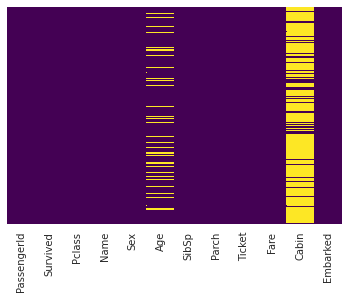

In [122]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### In the cabin column data for most of rows is missing. So we might need to drop it as it is not very useful.

#### For the age column some data is missing and most of it is available. We can use some method to predict the values for the missing age values.

In [9]:
sns.set_style('whitegrid')

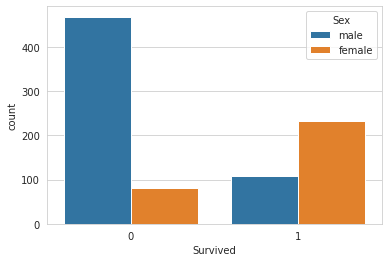

In [10]:
sns.countplot(x='Survived', hue='Sex', data=train)

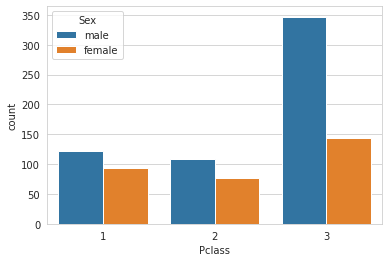

In [11]:
sns.countplot(x='Pclass', hue='Sex', data=train)

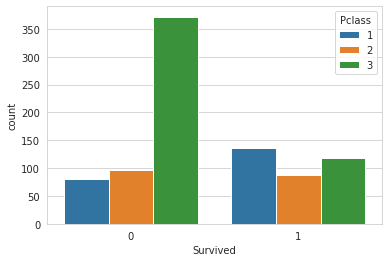

In [12]:
sns.countplot(x='Survived', hue='Pclass', data=train)

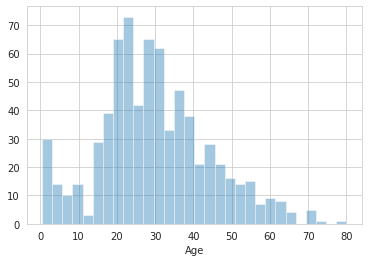

In [13]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

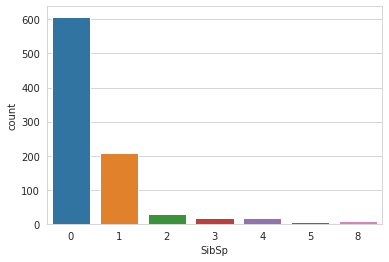

In [14]:
sns.countplot(x='SibSp', data=train)

In [15]:
train['Fare'].iplot(kind='hist', bins=30)

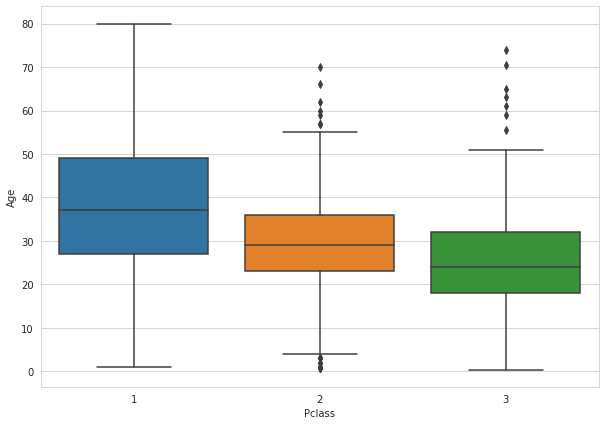

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

## Imputation

### Filling values in Age column

In [172]:
mean = train.groupby(['Pclass','Sex']).mean()[['Age']]
p1_mean_age_f = mean.iloc[0,0]
p1_mean_age_m = mean.iloc[1,0]
p2_mean_age_f = mean.iloc[2,0]
p2_mean_age_m = mean.iloc[3,0]
p3_mean_age_f = mean.iloc[4,0]
p3_mean_age_m = mean.iloc[5,0]
mean

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [173]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]

    if(pd.isnull(Age)):
        if(Pclass==1 and Sex=='female'):
            return p1_mean_age_f
        elif(Pclass==1 and Sex=='male'):
            return p1_mean_age_m
        elif(Pclass==2 and Sex=='female'):
            return p2_mean_age_f
        elif(Pclass==2 and Sex=='male'):
            return p2_mean_age_m
        elif(Pclass==3 and Sex=='female'):
            return p3_mean_age_f
        elif(Pclass==3 and Sex=='male'):
            return p3_mean_age_m
    else:
        return Age
        

In [174]:
train['Age'] = train[['Age','Pclass','Sex']].apply(impute_age,axis=1)

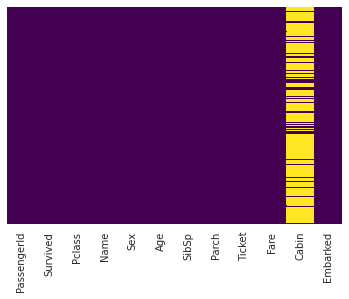

In [175]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Deleting Cabin column

In [176]:
train.drop('Cabin',axis=1,inplace=True)

In [177]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


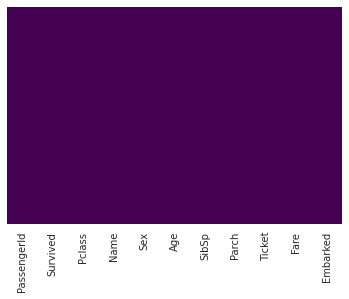

In [178]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Droping any row which has null value for any column

In [179]:
train.dropna(inplace=True)

## Changing categorical columns to numbers

#### There is a very strong correlation(-1) betwenn female and male column. This causes multicollinearity which can increases inaccuracy in out model. 
Some of the problems that might be caused are:-
1. The coefficient becomes very sensitive to small changes in the model.
2. the columns in regressin are supposed to be as less correlated as possible.

Droping one of female or male column with solve the problem.

In [180]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

For embark column there are 3 types: C, Q, S
Any two columns will be able to predict the third one

In [181]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [182]:
train = pd.concat([train,sex,embark],axis=1)

In [183]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [184]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [185]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
